# Fokus Analisa Produk

##### 1. Sebuah perusahaan ingin mengetahui 10 produk yang paling laku 
##### 2. Sebuah perusahaan ingin mengetahui 10 produk yang paling banyak di-cancel

Me-ngimport library yang dibutuhkan

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

Connect ke database dan membuat objek cursor

In [145]:
conn = sqlite3.connect('olist.db')

cursor = conn.cursor()

Melihat table yang ada pada database

In [148]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
tables

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


Melalukan query pada beberapa tables yang sekiranya akan dibutuhkan

In [146]:
con = sqlite3.connect('olist.db')
cr = con.cursor()
query = '''SELECT * FROM ''' + 'olist_order_customer_dataset'
cr.execute(query)

res = cr.fetchall()
cols = [col[0] `for col in cr.description]

df = pd.DataFrame(res, columns = cols).drop('index', axis=1)
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [149]:
query = """
SELECT * FROM olist_order_dataset
"""

order = pd.read_sql(query, con)
order

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [150]:
query = """
SELECT * FROM olist_order_items_dataset;
"""

order_items = pd.read_sql(query, con)
order_items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [52]:
query = """
SELECT * FROM olist_products_dataset
"""

# Mengakses table products
products = pd.read_sql(query, con)
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [151]:
query = """
SELECT * FROM product_category_name_translation ;
"""

product_category = pd.read_sql(query, con)
product_category

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [152]:
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


Memilih produk yang sekiranya dibutuhkan

In [153]:
products = products[['product_id', 'product_category_name']]
products

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [154]:
query = """
SELECT * FROM product_category_name_translation ;
"""

product_category = pd.read_sql(query, con)
product_category

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [155]:
products = products[['product_id','product_category_name']]
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


Drop kolom index. Karena tidak dibutuhkan.

In [156]:
product_category.drop(['index'], axis = 1, inplace = True)

In [157]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [158]:
# Mengganti product name bahasa spanyol menjadi bahasa inggris dengan menggunakan left join dengan tabel category products
merged_product = products.merge(product_category, how='left', on='product_category_name')

# Menemukan produk yang tidak ada di tabel product_category
missing_products = merged_product[merged_product['product_category_name_english'].isnull()]

# Menampilkan produk yang tidak ada di tabel product_category
missing_product_names = missing_products['product_category_name'].unique()
print("Produk yang tidak ada di tabel product_category:")
print(missing_product_names)

# Mengganti manual value produk yang tidak ada di tabel product_category
replacement_mapping = {
    'product_category_name_english': {
        'nama_produk_1': 'product_category_1',
        'nama_produk_2': 'product_category_2'
    }
}
merged_product.replace(replacement_mapping, inplace=True)

# Menampilkan hasil akhir setelah penggantian
print("Hasil setelah penggantian:")
print(merged_product)


Produk yang tidak ada di tabel product_category:
[None 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']
Hasil setelah penggantian:
                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   


In [159]:
gamer = merged_product['product_category_name'] == 'pc_gamer'
alimentos = merged_product['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos'

# Menggunakan kondisi pertama dan kedua untuk memfilter DataFrame
filtered_product = merged_product[gamer | alimentos]

# Menampilkan hasil filter
print("Hasil filter:")
print(filtered_product)

# Menambahkan produk yang belum ada ke dalam tabel product_category
new_product_1 = ['pc_gamer', 'pc_gamer']
new_product_2 = ['portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen food preparation']
product_category.loc[len(product_category.index)] = new_product_1
product_category.loc[len(product_category.index)] = new_product_2

# Menampilkan tabel product_category setelah penambahan
print("Tabel product_category setelah penambahan:")
product_category

Hasil filter:
                             product_id  \
1628   0105b5323d24fc655f73052694dbbb3a   
5821   6fd83eb3e0799b775e4f946bd66657c0   
7325   5d923ead886c44b86845f69e50520c3e   
7478   6727051471a0fc4a0e7737b57bff2549   
8819   bed164d9d628cf0593003389c535c6e0   
11039  1220978a08a6b29a202bc015b18250e9   
14266  ae62bb0f95af63d64eae5f93dddea8d3   
16182  1954739d84629e7323a4295812a3e0ec   
16930  dbe520fb381ad695a7e1f2807d20c765   
17800  c7a3f1a7f9eef146cc499368b578b884   
18610  7afdd65f79f63819ff5bee328843fa37   
26890  a4756663d007b0cd1af865754d08d968   
29919  cb9d764f38ee4d0c00af64d5c388f837   

                               product_category_name  \
1628                                        pc_gamer   
5821   portateis_cozinha_e_preparadores_de_alimentos   
7325   portateis_cozinha_e_preparadores_de_alimentos   
7478                                        pc_gamer   
8819   portateis_cozinha_e_preparadores_de_alimentos   
11039  portateis_cozinha_e_preparadores_de_alim

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer


In [160]:
# Join tabel produk dengan product_category
new_products = products.merge(product_category, how='left', on='product_category_name')
new_products

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [161]:
new_products.drop(['product_category_name'], axis = 1, inplace = True)

In [162]:
new_products.rename(columns={'product_category_name_english': 'product_name'},inplace=True)
new_products.head()

,product_id,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [163]:
# Mengecek persentase missing value pada table new products
new_products.isnull().sum()/len(products)*100

product_id      0.000000
product_name    1.851234
dtype: float64

In [164]:
# Mengecek missing value pada table new products
new_products.isnull().sum()

product_id        0
product_name    610
dtype: int64

In [165]:
# Handling missing value pada table new products
# Isi missing value dengan 'unknown'
new_products['product_name'] = new_products['product_name'].fillna('unknown')

# mengecek missing value lagi
new_products.isnull().sum()

product_id      0
product_name    0
dtype: int64

In [166]:
order = order[['order_id', 'order_status', 'order_purchase_timestamp']]
order.head()

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39


In [167]:
order.dtypes

order_id                    object
order_status                object
order_purchase_timestamp    object
dtype: object

In [168]:
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], yearfirst = True)
order.dtypes

C:\Users\asus\AppData\Local\Temp\ipykernel_14604\3454529322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], yearfirst = True)


order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [169]:
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Mengecek missing value pada table order item

In [170]:
order_items.isnull().sum()

index                  0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Melekukan pengecekan ada atau tidaknya kolom duplikat

In [171]:
new_products.duplicated().any(), order.duplicated().any(), order_items.duplicated().any()

(False, False, False)

In [172]:
new_products['product_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

In [173]:
new_products['product_name'].value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: product_name, Length: 74, dtype: int64

In [174]:
order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

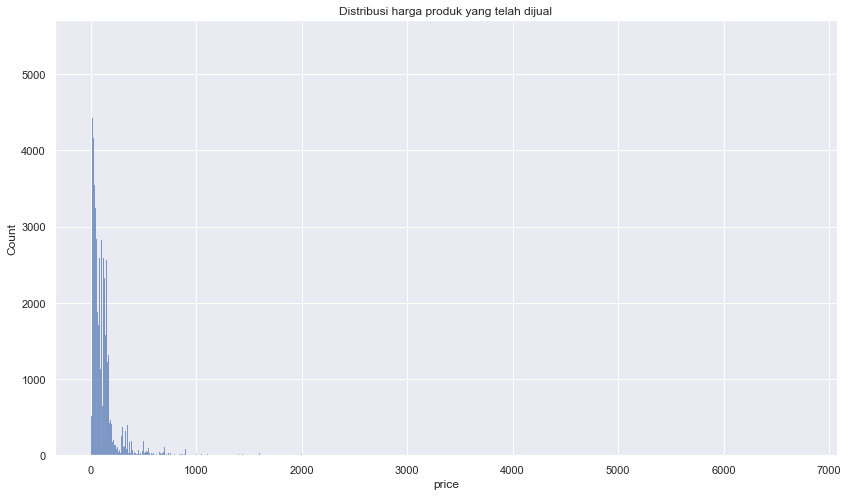

In [175]:
# visualisasi distribusi data price
sns.set(rc={'figure.figsize':(14,8)})
sns.histplot(data = order_items, x = 'price').set_title("Distribusi harga produk yang telah dijual")
plt.show()

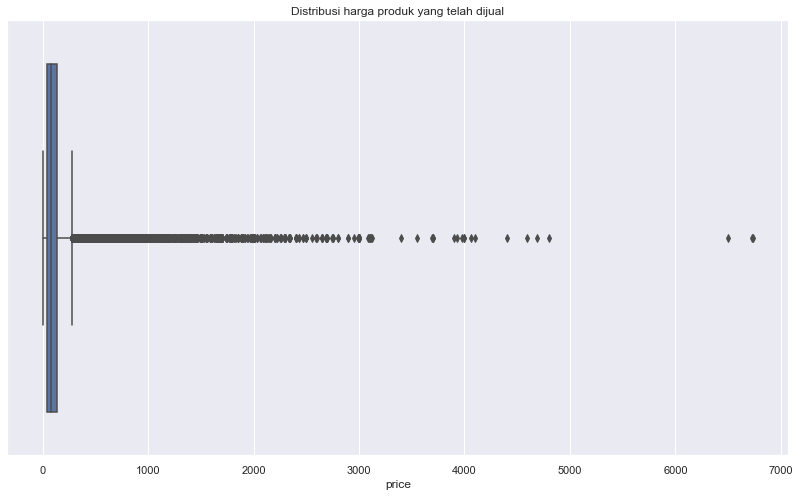

In [176]:
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(data = order_items, x = 'price').set_title("Distribusi harga produk yang telah dijual")
plt.show()

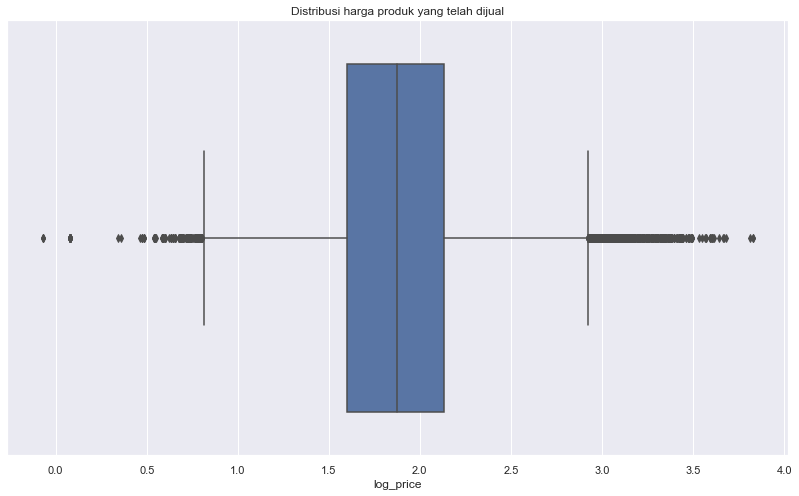

In [177]:
# visualisasi distribusi data price
sns.set(rc={'figure.figsize':(14,8)})

# TRANSFORMASI HARGA JADI LOG PRICE
order_items["log_price"] = np.log10(order_items["price"])
sns.boxplot(data = order_items, x = 'log_price').set_title("Distribusi harga produk yang telah dijual")
plt.show()

### Menggabungkan 3 tabel yang sudah terbentuk

In [178]:
# Left join table new_product dengan table order_items
most_products = order_items.merge(new_products, how='left', on='product_id')

# Left join table most_products dengan table order
most_products = most_products.merge(order, how='left', on='order_id')

# Menampilkan hasil join
most_products.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,log_price,product_name,order_status,order_purchase_timestamp
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.770115,cool_stuff,delivered,2017-09-13 08:59:02
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2.380030,pet_shop,delivered,2017-04-26 10:53:06
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2.298853,furniture_decor,delivered,2018-01-14 14:33:31
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.113609,perfumery,delivered,2018-08-08 10:00:35
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2.300813,garden_tools,delivered,2017-02-04 13:57:51


In [179]:
most_products.isnull().sum()

index                       0
order_id                    0
order_item_id               0
product_id                  0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
log_price                   0
product_name                0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [180]:
most_products.dtypes

index                                int64
order_id                            object
order_item_id                        int64
product_id                          object
seller_id                           object
shipping_limit_date                 object
price                              float64
freight_value                      float64
log_price                          float64
product_name                        object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [181]:
most_products['day'] = most_products['order_purchase_timestamp'].dt.day
most_products['month'] = most_products['order_purchase_timestamp'].dt.month
most_products['year'] = most_products['order_purchase_timestamp'].dt.year
most_products['hour'] = most_products['order_purchase_timestamp'].dt.hour

In [183]:
most_products.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,log_price,product_name,order_status,order_purchase_timestamp,day,month,year,hour
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.770115,cool_stuff,delivered,2017-09-13 08:59:02,13,9,2017,8
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2.380030,pet_shop,delivered,2017-04-26 10:53:06,26,4,2017,10
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2.298853,furniture_decor,delivered,2018-01-14 14:33:31,14,1,2018,14
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.113609,perfumery,delivered,2018-08-08 10:00:35,8,8,2018,10
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2.300813,garden_tools,delivered,2017-02-04 13:57:51,4,2,2017,13


In [184]:
top_products = most_products[['product_name','order_id']].groupby(['product_name']).count().sort_values(by = ['order_id'], ascending = False).head(10)
top_products = top_products.reset_index()
top_products

,product_name,order_id
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


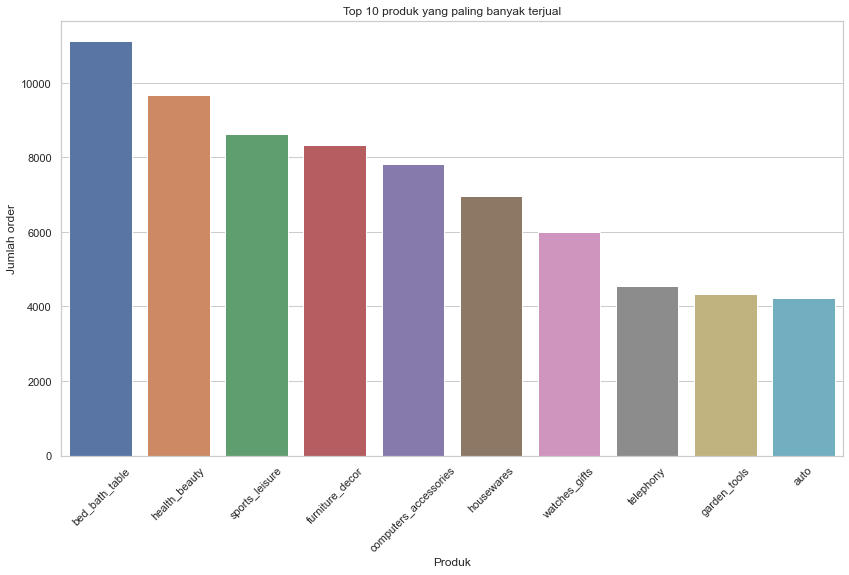

In [185]:
sns.set_style("whitegrid")
ax = sns.barplot(data=top_products, x=top_products['product_name'], y=top_products['order_id'])
plt.xticks(rotation=45)
plt.xlabel("Produk")
plt.ylabel("Jumlah order")
plt.title("Top 10 produk yang paling banyak terjual")
plt.show()

In [186]:
canceled_products = most_products[most_products['order_status'] == 'canceled'].groupby('product_name').size().reset_index(name='canceled_count').head(10)
canceled_products_sorted = canceled_products.sort_values(by='canceled_count', ascending=False)
canceled_products_sorted

,product_name,canceled_count
8,computers_accessories,46
3,auto,30
4,baby,20
5,bed_bath_table,18
9,consoles_games,10
6,books_general_interest,7
0,air_conditioning,2
1,art,1
2,audio,1
7,christmas_supplies,1


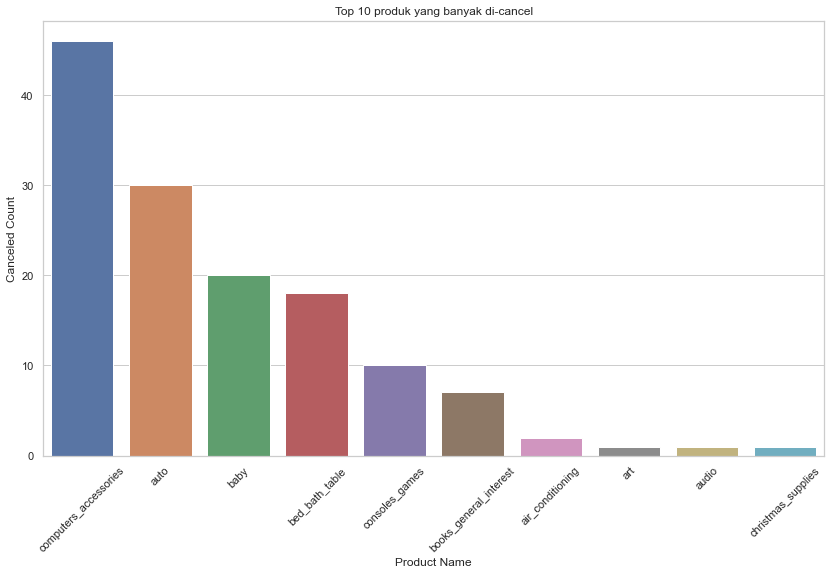

In [187]:
sns.set_style("whitegrid")
ax = sns.barplot(data=canceled_products_sorted, x=canceled_products_sorted['product_name'], y=canceled_products_sorted['canceled_count'])
ax.set_xlabel('Product Name')
ax.set_ylabel('Canceled Count')
plt.title("Top 10 produk yang banyak di-cancel")
plt.xticks(rotation=45)
plt.show()